# CodeBERTScore Analysis

This notebook analyzes the results of the CodeBERTScore calculation for Arduino sketches.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import os

import sys

grandparent_dir = os.path.dirname(os.path.dirname(os.getcwd()))
 

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

INO_DATASET = os.path.join(grandparent_dir,'codebertscore-similarity/analyser-results/similarity_results_ino.csv')
PY_DATASET = os.path.join(grandparent_dir,'codebertscore-similarity/analyser-results/similarity_results_py.csv')

## Load Data

In [4]:
df = pd.read_csv(INO_DATASET)
df.head()

,Candidate_ID,Precision,Recall,F1,F3,Reference_File,Timestamp
0,valid_20241029195419_gpt4o,0.871904,0.855313,0.863529,0.856944,codebertscore/example/object_color_classify.ino,2025-11-27T04:48:18.974600
1,valid_20241111181815_gpt4o,0.893114,0.869687,0.881244,0.871974,codebertscore/example/object_color_classify.ino,2025-11-27T04:48:20.745027
2,valid_20241109165946_gpt4o,0.890948,0.868202,0.879428,0.870424,codebertscore/example/object_color_classify.ino,2025-11-27T04:48:22.431711
3,valid_20241109165903_gpt4o,0.890723,0.867779,0.879101,0.870020,codebertscore/example/object_color_classify.ino,2025-11-27T04:48:24.102038
4,valid_20241115165754_gpt4o,0.885694,0.853176,0.869131,0.856320,codebertscore/example/object_color_classify.ino,2025-11-27T04:48:25.954703


## Data Preprocessing
Extract timestamps from `Candidate_ID` to analyze performance over time.

In [5]:
def parse_timestamp(candidate_id):
    # Format: valid_YYYYMMDDHHMMSS_gpt4o or valid_YYYYMMDDHHMMSS_
    match = re.search(r'valid_(\d{14})', candidate_id)
    if match:
        return datetime.strptime(match.group(1), '%Y%m%d%H%M%S')
    return None

df['Generation_Date'] = df['Candidate_ID'].apply(parse_timestamp)
df = df.sort_values('Generation_Date')
df.head()

,Candidate_ID,Precision,Recall,F1,F3,Reference_File,Timestamp,Generation_Date
78,valid_20241004145436_gpt4o,0.870494,0.867970,0.869230,0.868222,codebertscore/example/object_color_classify.ino,2025-11-27T04:51:02.749697,2024-10-04 14:54:36
79,valid_20241007104559_gpt4o,0.875046,0.856697,0.865775,0.858498,codebertscore/example/object_color_classify.ino,2025-11-27T04:51:04.444027,2024-10-07 10:45:59
30,valid_20241007104941_gpt4o,0.886570,0.857473,0.871779,0.860297,codebertscore/example/object_color_classify.ino,2025-11-27T04:49:21.033639,2024-10-07 10:49:41
19,valid_20241007105713_gpt4o,0.761736,0.647720,0.700117,0.657562,codebertscore/example/object_color_classify.ino,2025-11-27T04:48:58.388671,2024-10-07 10:57:13
66,valid_20241007105951_gpt4o,0.889323,0.853748,0.871173,0.857177,codebertscore/example/object_color_classify.ino,2025-11-27T04:50:42.559126,2024-10-07 10:59:51


## Statistical Summary

In [6]:
df[['Precision', 'Recall', 'F1', 'F3']].describe()

,Precision,Recall,F1,F3
count,88.000000,88.000000,88.000000,88.000000
mean,0.874410,0.848074,0.860902,0.850589
std,0.026293,0.042796,0.034850,0.041272
min,0.753645,0.647720,0.700117,0.657562
25%,0.871337,0.853064,0.863022,0.855027
50%,0.881471,0.859085,0.869855,0.861258
75%,0.887164,0.864704,0.875219,0.866591
max,0.909120,0.876471,0.892497,0.879630


## Distributions

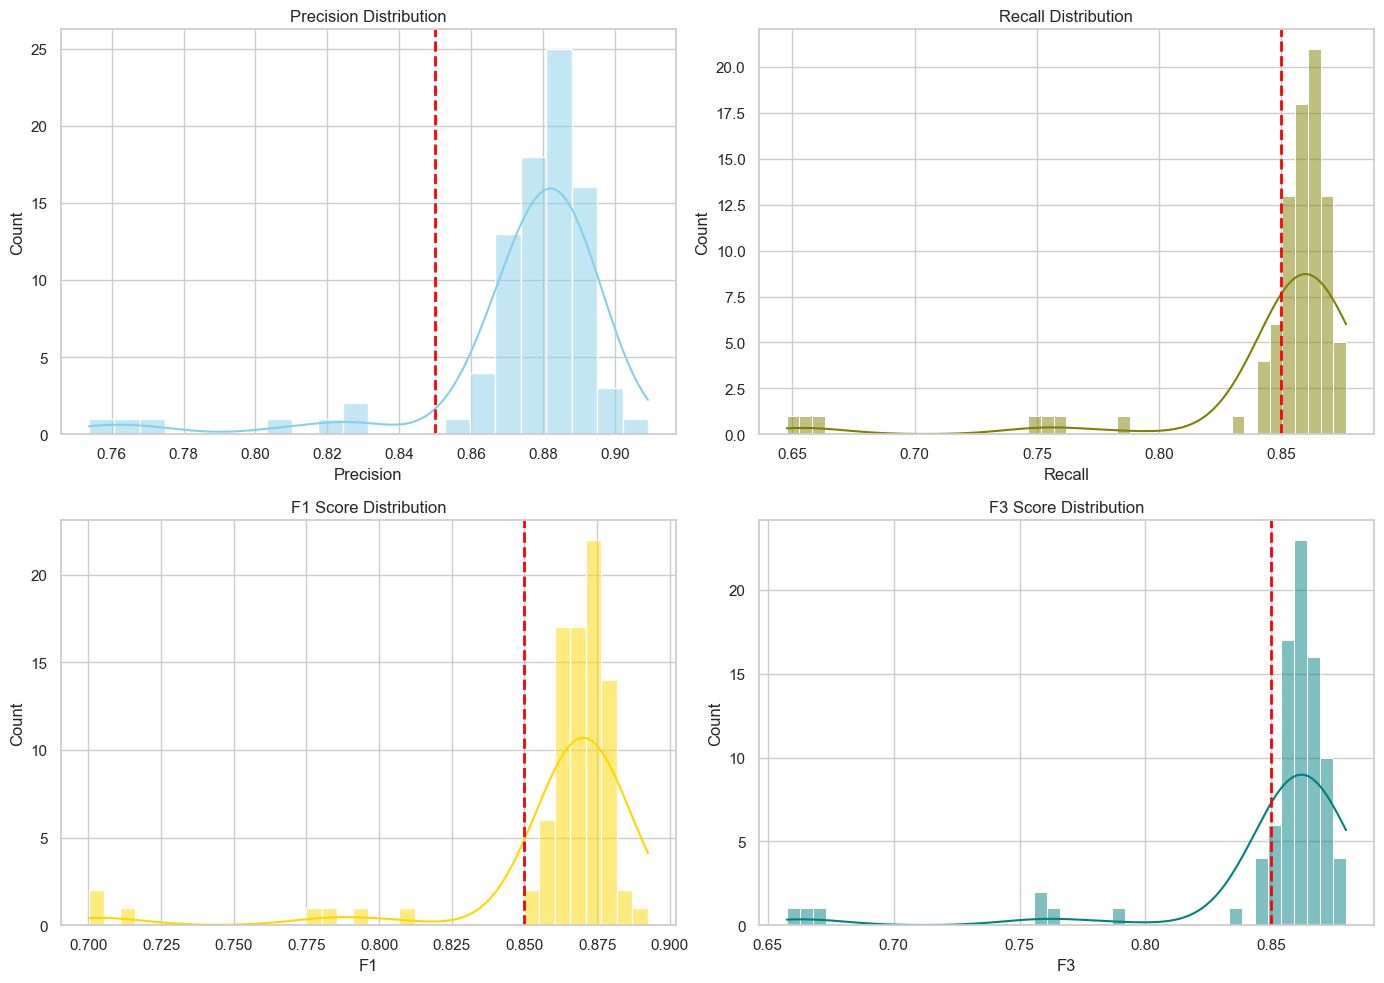

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Precision
sns.histplot(df['Precision'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Precision Distribution')

# Recall
sns.histplot(df['Recall'], kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Recall Distribution')

# F1
sns.histplot(df['F1'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('F1 Score Distribution')

# F3
sns.histplot(df['F3'], kde=True, ax=axes[1, 1], color='teal')
axes[1, 1].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('F3 Score Distribution')

plt.tight_layout()
plt.show()


## Performance Over Time

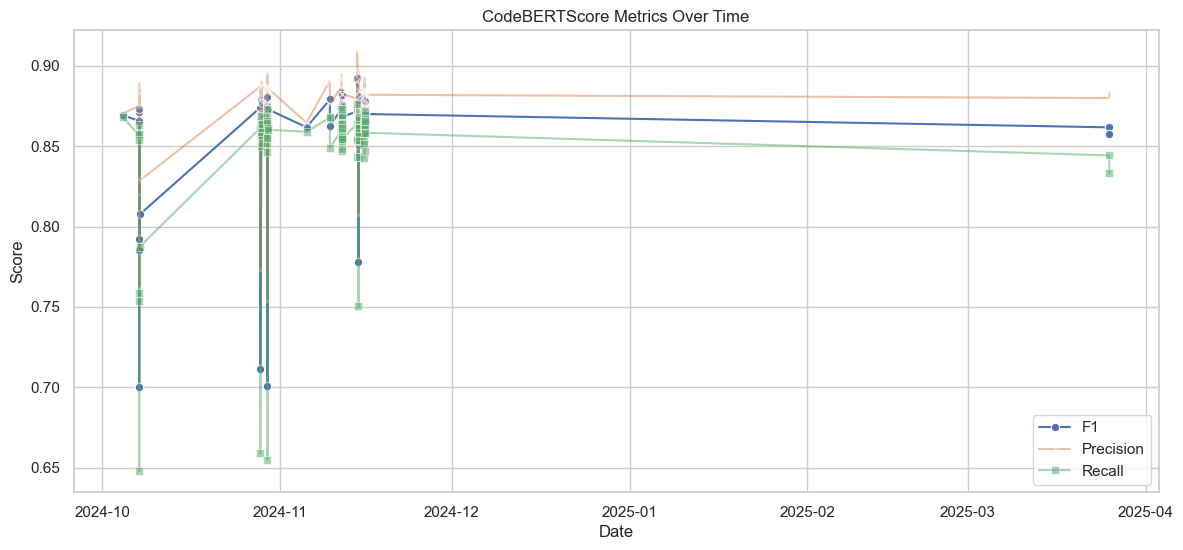

In [8]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Generation_Date', y='F1', marker='o', label='F1')
sns.lineplot(data=df, x='Generation_Date', y='Precision', marker='x', label='Precision', alpha=0.5)
sns.lineplot(data=df, x='Generation_Date', y='Recall', marker='s', label='Recall', alpha=0.5)

plt.title('CodeBERTScore Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.show()

## Correlation Analysis

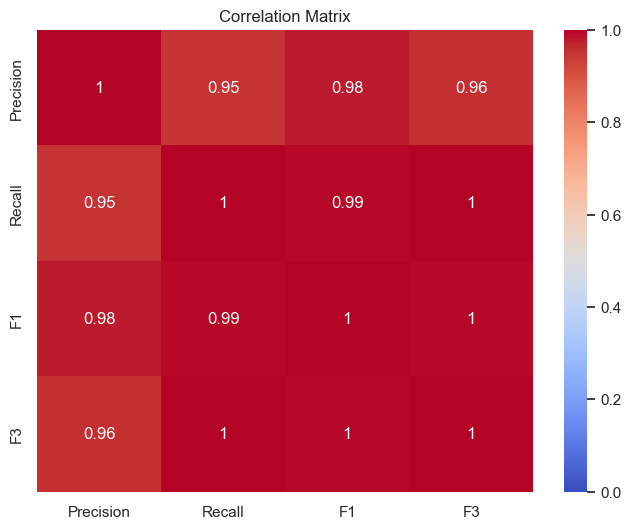

In [9]:
corr = df[['Precision', 'Recall', 'F1', 'F3']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Top Performers

In [10]:
print("Top 5 Candidates by F1 Score:")
df.nlargest(5, 'F1')[['Candidate_ID', 'F1', 'Precision', 'Recall', 'Generation_Date']]

Top 5 Candidates by F1 Score:


,Candidate_ID,F1,Precision,Recall,Generation_Date
60,valid_20241114111404_gpt4o,0.892497,0.909120,0.876471,2024-11-14 11:14:04
6,valid_20241111171530_gpt4o,0.883823,0.894868,0.873047,2024-11-11 17:15:30
47,valid_20241111185249_gpt4o,0.882098,0.890878,0.873488,2024-11-11 18:52:49
29,valid_20241114174545_gpt4o,0.881562,0.896604,0.867015,2024-11-14 17:45:45
75,valid_20241114182809_gpt4o,0.881538,0.895590,0.867920,2024-11-14 18:28:09


## Python CodeBERTScore Analysis

Analysis of `similarity_results_py.csv` which includes Model information.

In [11]:
df_py = pd.read_csv(PY_DATASET)
df_py.head()

,Candidate_ID,Model,Precision,Recall,F1,F3,Language,Timestamp
0,valid_20250730210433_psg_gemma3:27b,gemma3:27b,0.811435,0.756264,0.782879,0.761441,python,2025-11-27T14:58:24.147752
1,valid_20250804075604_psg_qwen2.5-coder:32b,qwen2.5-coder:32b,0.832663,0.748272,0.788215,0.755934,python,2025-11-27T14:58:28.067586
2,valid_20250812212920_psg_gemma3:27b,gemma3:27b,0.796346,0.705408,0.748123,0.713556,python,2025-11-27T14:58:31.657047
3,valid_20250818190048_psg_phi4:latest,phi4:latest,0.861302,0.764428,0.809979,0.773124,python,2025-11-27T14:58:35.791737
4,valid_20250805033526_psg_gemma3:27b,gemma3:27b,0.800671,0.720008,0.758200,0.727336,python,2025-11-27T14:58:39.295554


## Data Preprocessing
Extract timestamps and sort.

In [12]:
df_py['Generation_Date'] = df_py['Candidate_ID'].apply(parse_timestamp)
df_py = df_py.sort_values('Generation_Date')
df_py.head()

,Candidate_ID,Model,Precision,Recall,F1,F3,Language,Timestamp,Generation_Date
876,valid_20250520011233_psg_gpt-4o,gpt-4o,0.856076,0.790642,0.822059,0.796732,python,2025-11-27T15:39:45.667756,2025-05-20 01:12:33
879,valid_20250520011233_psg_gpt-4o,gpt-4o,0.856076,0.790642,0.822059,0.796732,python,2025-11-27T15:39:53.293154,2025-05-20 01:12:33
764,valid_20250520011746_psg_gpt-4o,gpt-4o,0.861202,0.771971,0.814149,0.780054,python,2025-11-27T15:35:09.410741,2025-05-20 01:17:46
767,valid_20250520011746_psg_gpt-4o,gpt-4o,0.861202,0.771971,0.814149,0.780054,python,2025-11-27T15:35:15.334097,2025-05-20 01:17:46
570,valid_20250520022146_psg_qwen2.5-coder:32b,qwen2.5-coder:32b,0.844587,0.764721,0.802672,0.772021,python,2025-11-27T15:26:46.320249,2025-05-20 02:21:46


## Statistical Summary

In [13]:
df_py[['Precision', 'Recall', 'F1', 'F3']].describe()

,Precision,Recall,F1,F3
count,913.000000,913.000000,913.000000,913.000000
mean,0.837492,0.739158,0.784790,0.747807
std,0.031414,0.051279,0.042931,0.049897
min,0.690904,0.426664,0.535913,0.444799
25%,0.819158,0.732003,0.772686,0.739939
50%,0.844587,0.751319,0.798797,0.760555
75%,0.861887,0.764428,0.809979,0.773124
max,0.895174,0.790642,0.830342,0.796732


## Analysis by Model

In [14]:
model_stats = df_py.groupby('Model')[['Precision', 'Recall', 'F1', 'F3']].agg(['mean', 'std', 'count'])
model_stats

Precision                    Recall                  \
                       mean       std count      mean       std count   
Model                                                                   
codestral:latest   0.844378  0.051121   105  0.714121  0.095169   105   
gemma3:27b         0.805617  0.014983   217  0.719966  0.019398   217   
gpt-4o             0.858639  0.002959     4  0.781307  0.010780     4   
phi4:latest        0.858747  0.012563   203  0.761230  0.037574   203   
qwen2.5-coder:14b  0.852946  0.022258   108  0.744305  0.046168   108   
qwen2.5-coder:32b  0.837946  0.023355   276  0.744915  0.046614   276   

                         F1                        F3                  
                       mean       std count      mean       std count  
Model                                                                  
codestral:latest   0.772389  0.079904   105  0.724922  0.092849   105  
gemma3:27b         0.760352  0.017007   217  0.727691  0.018923   217  
gpt-4o             0.818104  0.004567     4  0.788393  0.009629     4  
phi4:latest        0.806700  0.028243   203  0.769875  0.036092   203  
qwen2.5-coder:14b  0.794526  0.038038   108  0.753798  0.044945   108  
qwen2.5-coder:32b  0.788313  0.037031   276  0.753167  0.045008   276

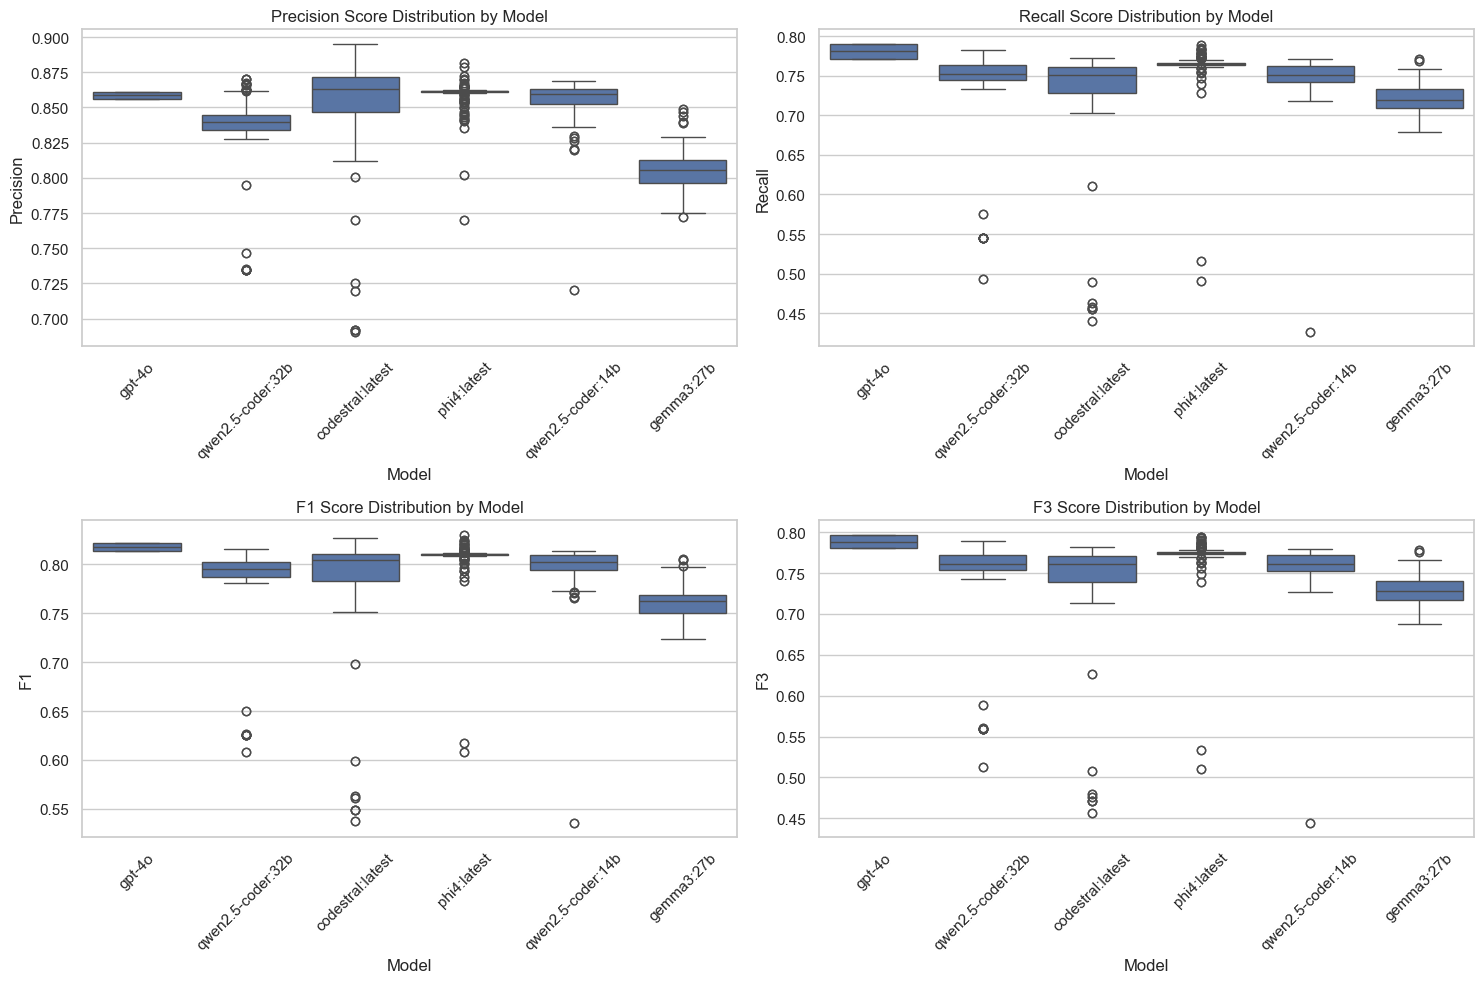

In [15]:
metrics = ['Precision', 'Recall', 'F1', 'F3']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Model', y=metric, data=df_py)
    plt.title(f'{metric} Score Distribution by Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

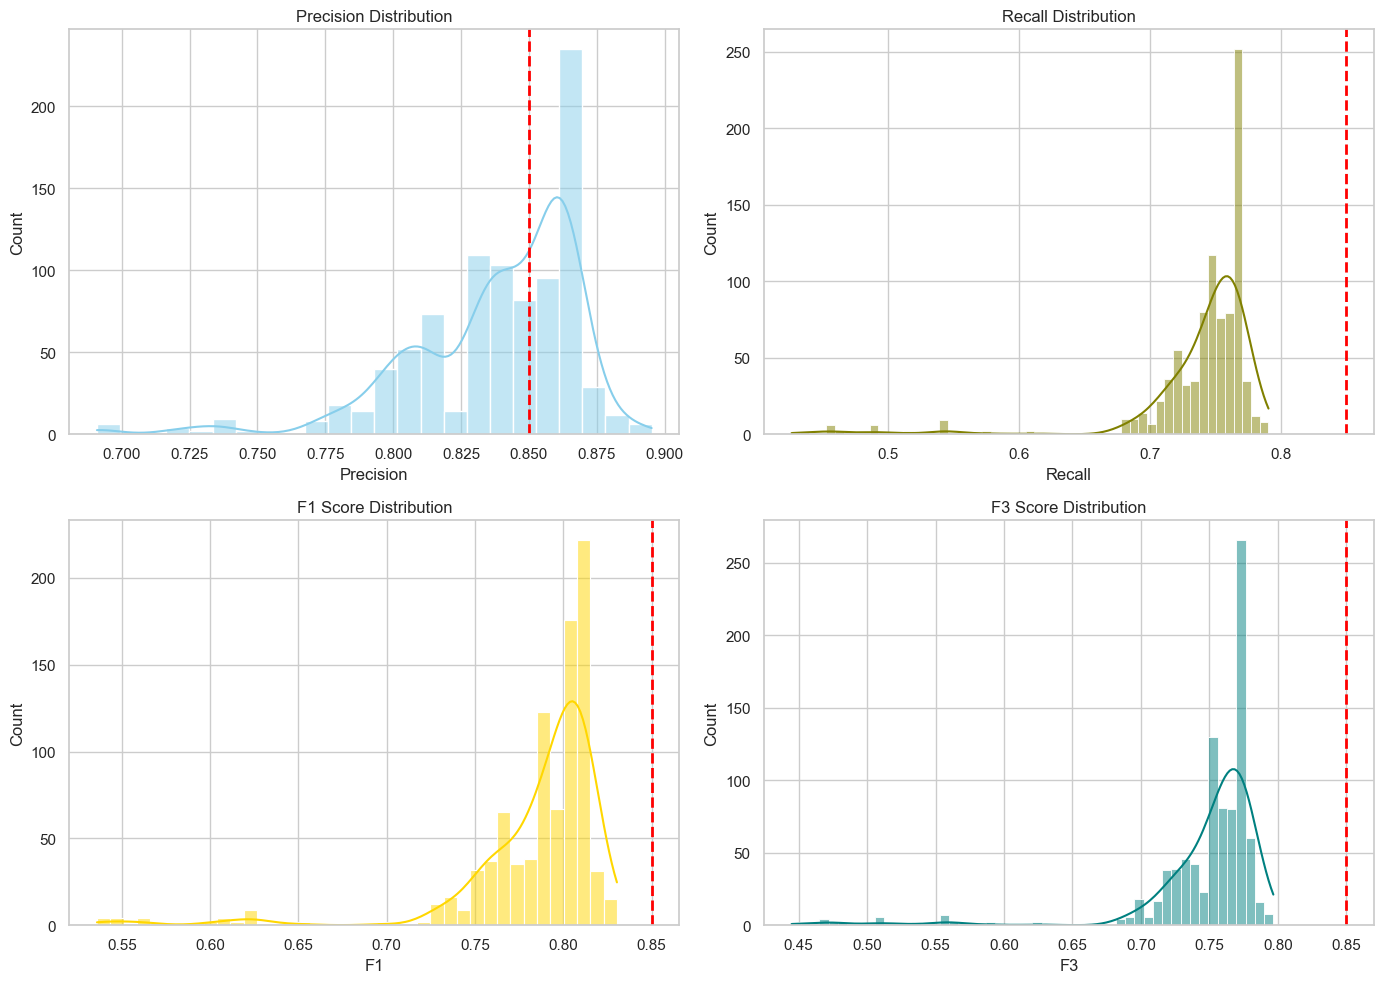

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Precision
sns.histplot(df_py['Precision'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Precision Distribution')

# Recall
sns.histplot(df_py['Recall'], kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Recall Distribution')

# F1
sns.histplot(df_py['F1'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('F1 Score Distribution')

# F3
sns.histplot(df_py['F3'], kde=True, ax=axes[1, 1], color='teal')
axes[1, 1].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('F3 Score Distribution')

plt.tight_layout()
plt.show()